## Program to Predict Air Passenger Traffic in Singapore using RNN

In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.
/home/pui-user/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# Assigning a random seed for reproducability
np.random.seed(666)

In [3]:
# Loading the File
dataframe = pd.read_csv('total-air-passenger-arrivals.csv', \
                        usecols=[1], engine='python', skipfooter=3)

In [4]:
#Converting to a Float datatype to convert to Numpy Array
dataset = dataframe.values
dataset = dataset.astype('float32')

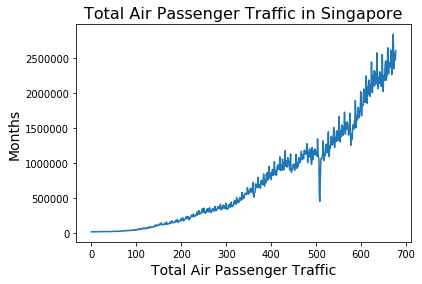

In [5]:
plt.plot(dataset)
plt.xlabel('Total Air Passenger Traffic', fontsize=14)
plt.ylabel('Months', fontsize=14)
plt.title('Total Air Passenger Traffic in Singapore', fontsize = 16)
plt.show()

### Fig.1: This figure shows the overall Air Passenger Traffic in Singapore in tonnes as a function of months.

In [6]:
# Assigning Range
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [7]:
#Dividing Training and Test Sample
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print ("train_data_size: " + str(len(train)), " test_data_size: "+str(len(test)))

train_data_size: 454  test_data_size: 224


In [8]:
#Function to Create Nump Dataset
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [9]:
# Assigning X to t and Y to t+!
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [10]:
# Reshaping the Array
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [11]:
#Creating the LSTM model and fitting to it
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)

/home/pui-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/pui-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(4, input_shape=(None, 1))`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/pui-user/anaconda3/lib/python3.6/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
 - 1s - loss: 0.0070
Epoch 2/100
 - 1s - loss: 0.0025
Epoch 3/100
 - 1s - loss: 5.0422e-04
Epoch 4/100
 - 1s - loss: 2.5968e-04
Epoch 5/100
 - 1s - loss: 2.5663e-04
Epoch 6/100
 - 1s - loss: 2.6629e-04
Epoch 7/100
 - 1s - loss: 2.6365e-04
Epoch 8/100
 - 1s - loss: 2.5783e-04
Epoch 9/100
 - 1s - loss: 2.5225e-04
Epoch 10/100
 - 1s - loss: 2.6605e-04
Epoch 11/100
 - 1s - loss: 2.6067e-04
Epoch 12/100
 - 1s - loss: 2.6093e-04
Epoch 13/100
 - 1s - loss: 2.6061e-04
Epoch 14/100
 - 1s - loss: 2.6618e-04
Epoch 15/100
 - 1s - loss: 2.6301e-04
Epoch 16/100
 - 1s - loss: 2.6360e-04
Epoch 17/100
 - 1s - loss: 2.5850e-04
Epoch 18/100
 - 1s - loss: 2.5347e-04
Epoch 19/100
 - 1s - loss: 2.5219e-04
Epoch 20/100
 - 1s - loss: 2.5924e-04
Epoch 21/100
 - 1s - loss: 2.6161e-04
Epoch 22/100
 - 1s - loss: 2.5702e-04
Epoch 23/100
 - 1s - loss: 2.6627e-04
Epoch 24/100
 - 1s - loss: 2.5095e-04
Epoch 25/100
 - 1s - loss: 2.5208e-04
Epoch 26/100
 - 1s - loss: 2.5259e-04
Epoch 27/100
 - 1s - loss: 2.

In [12]:
#Creating PRediction Results
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [13]:
#Inverting the Predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [14]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print(trainY[0])
print(trainPredict[:,0])
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print(testY[0])
print(testPredict[:,0])
print('Test Score: %.2f RMSE' % (testScore))

[   11027.00002435    12702.99944807    13159.00052606    12220.99950383
    11531.99992768    13654.99975855    13500.99968896    12974.00033988
    13618.99970809    13505.00042594    14951.00025865    13148.99934185
    12195.99983448    13230.00011362    15300.00038215    14351.99949218
    12694.00009369    14982.00037524    15403.00059966    14134.99999253
    14856.00019863    16290.00045334    16798.00058029    14446.00035531
    13284.00018931    15992.99937881    17141.00025656    16200.00032719
    13854.00054944    17634.0005819     18277.99943674    14838.0001734
    14671.00001245    16172.00043421    16308.00047857    15534.99990703
    16770.99988421    16947.9999129     16667.99966671    17118.00029746
    14444.99984195    16280.99978249    16700.99949355    14977.99963826
    17095.99953525    18244.9996099     19885.99949652    17864.00017291
    16987.99938387    18570.9997743     20257.99957912    20467.99943465
    16531.00042546    21019.00057266    21031.999347

In [15]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 42357.51 RMSE
Test Score: 302218.20 RMSE


In [16]:
# Shift Dataset to Plot
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [17]:
#Shift Prediction to plot
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

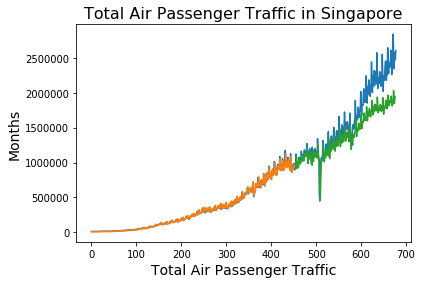

In [18]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlabel('Total Air Passenger Traffic', fontsize=14)
plt.ylabel('Months', fontsize=14)
plt.title('Total Air Passenger Traffic in Singapore', fontsize = 16)
plt.show()


### Fig.2: This figure shows the actual and predicted values of total Air Passenger Traffic in Singapore based on the model. The plot in Blue is the actual value, the plot in orange is for the training data and the plot in Green is for the Prediction data